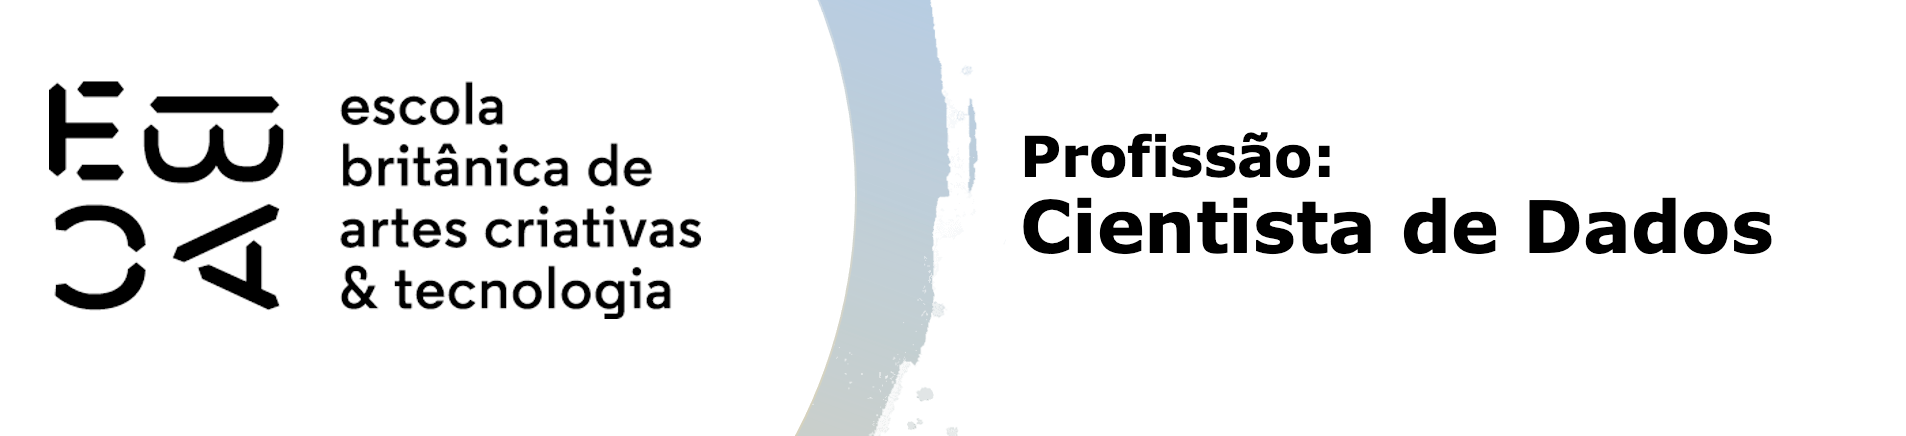

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
df = pd.read_csv('online_shoppers_intention.csv')

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                34.472398       31.731468              1194.746220  
std     

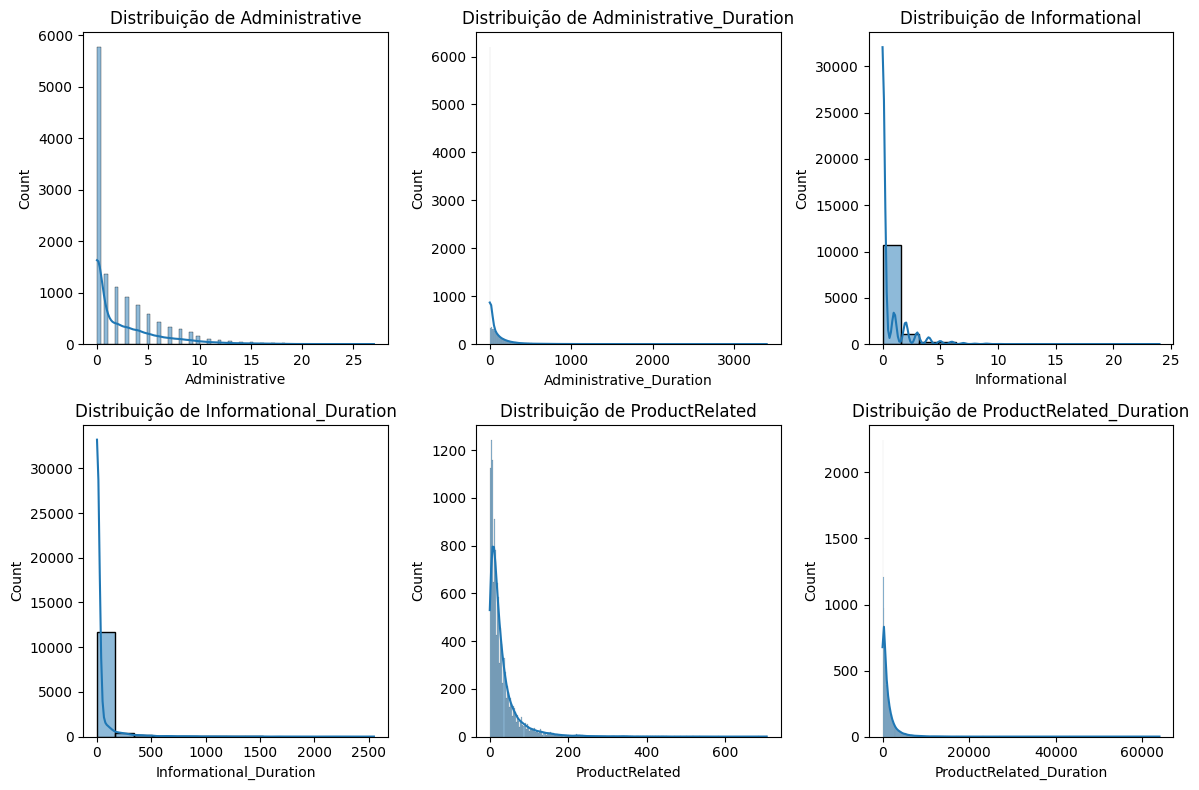

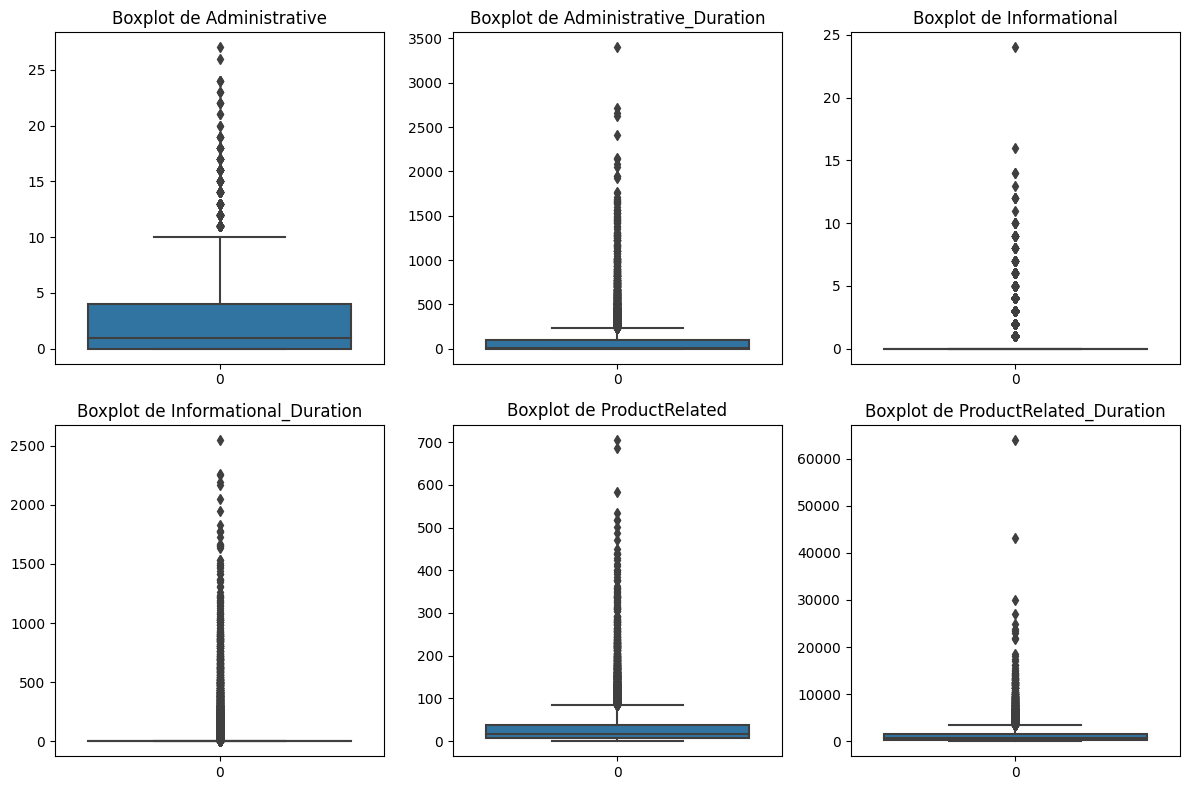

In [14]:


df = pd.read_csv('online_shoppers_intention.csv')

df.head()

cols_of_interest = ['Administrative', 'Administrative_Duration', 
                    'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration']

print(df[cols_of_interest].isnull().sum())

print(df[cols_of_interest].describe())

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_of_interest, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_of_interest, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [15]:
cols_of_interest = ['Administrative', 'Administrative_Duration', 
                    'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration']


In [16]:
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols_of_interest])


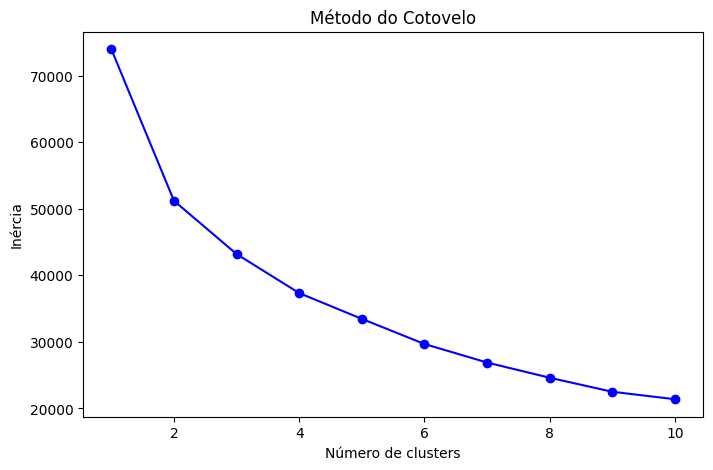

In [17]:
# 1. Método do cotovelo (Elbow Method)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

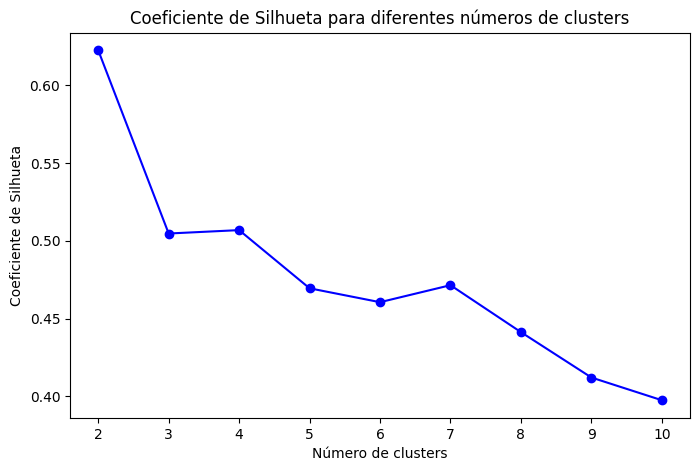

In [18]:
# 2. Coeficiente de Silhueta
silhouette_scores = []
K_range_silhouette = range(2, 11)

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plotando o gráfico do Coeficiente de Silhueta
plt.figure(figsize=(8, 5))
plt.plot(K_range_silhouette, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta para diferentes números de clusters')
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [19]:
# Definindo dois valores de k baseados nas análises anteriores (ex: 3 e 5 clusters)
k1 = 3  # primeira solução
k2 = 5  # segunda solução

In [20]:
# Aplicando K-means com k1 clusters
kmeans_3 = KMeans(n_clusters=k1, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(X_scaled)

In [21]:
# Aplicando K-means com k2 clusters
kmeans_5 = KMeans(n_clusters=k2, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(X_scaled)

In [22]:
# 1. Análise descritiva para 3 clusters
print("Análise descritiva para 3 clusters:")
print(df.groupby('Cluster_3')[cols_of_interest].mean())

Análise descritiva para 3 clusters:
           Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                6.523289               251.030033       0.973674   
1                7.058201               266.421802       4.086420   
2                0.907898                24.277938       0.160103   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_3                                                                   
0                       42.301835       55.539490              2056.320976  
1                      458.371554      138.380952              5731.105279  
2                        6.531608       18.900366               689.114236  


In [23]:
# 2. Análise descritiva para 5 clusters
print("\nAnálise descritiva para 5 clusters:")
print(df.groupby('Cluster_5')[cols_of_interest].mean())


Análise descritiva para 5 clusters:
           Administrative  Administrative_Duration  Informational  \
Cluster_5                                                           
0                5.582528               158.163005       0.644610   
1                5.628521               173.212603       4.290493   
2                0.714769                19.874827       0.133808   
3                8.092050               278.490810       2.451883   
4                8.701149               903.156719       1.168582   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_5                                                                   
0                       22.786428       52.605948              1937.690463  
1                      463.808375       59.989437              2452.205178  
2                        4.778345       16.818012               606.090667  
3                      177.884338      243.493724              9813.831265  
4                

<Figure size 1000x600 with 0 Axes>

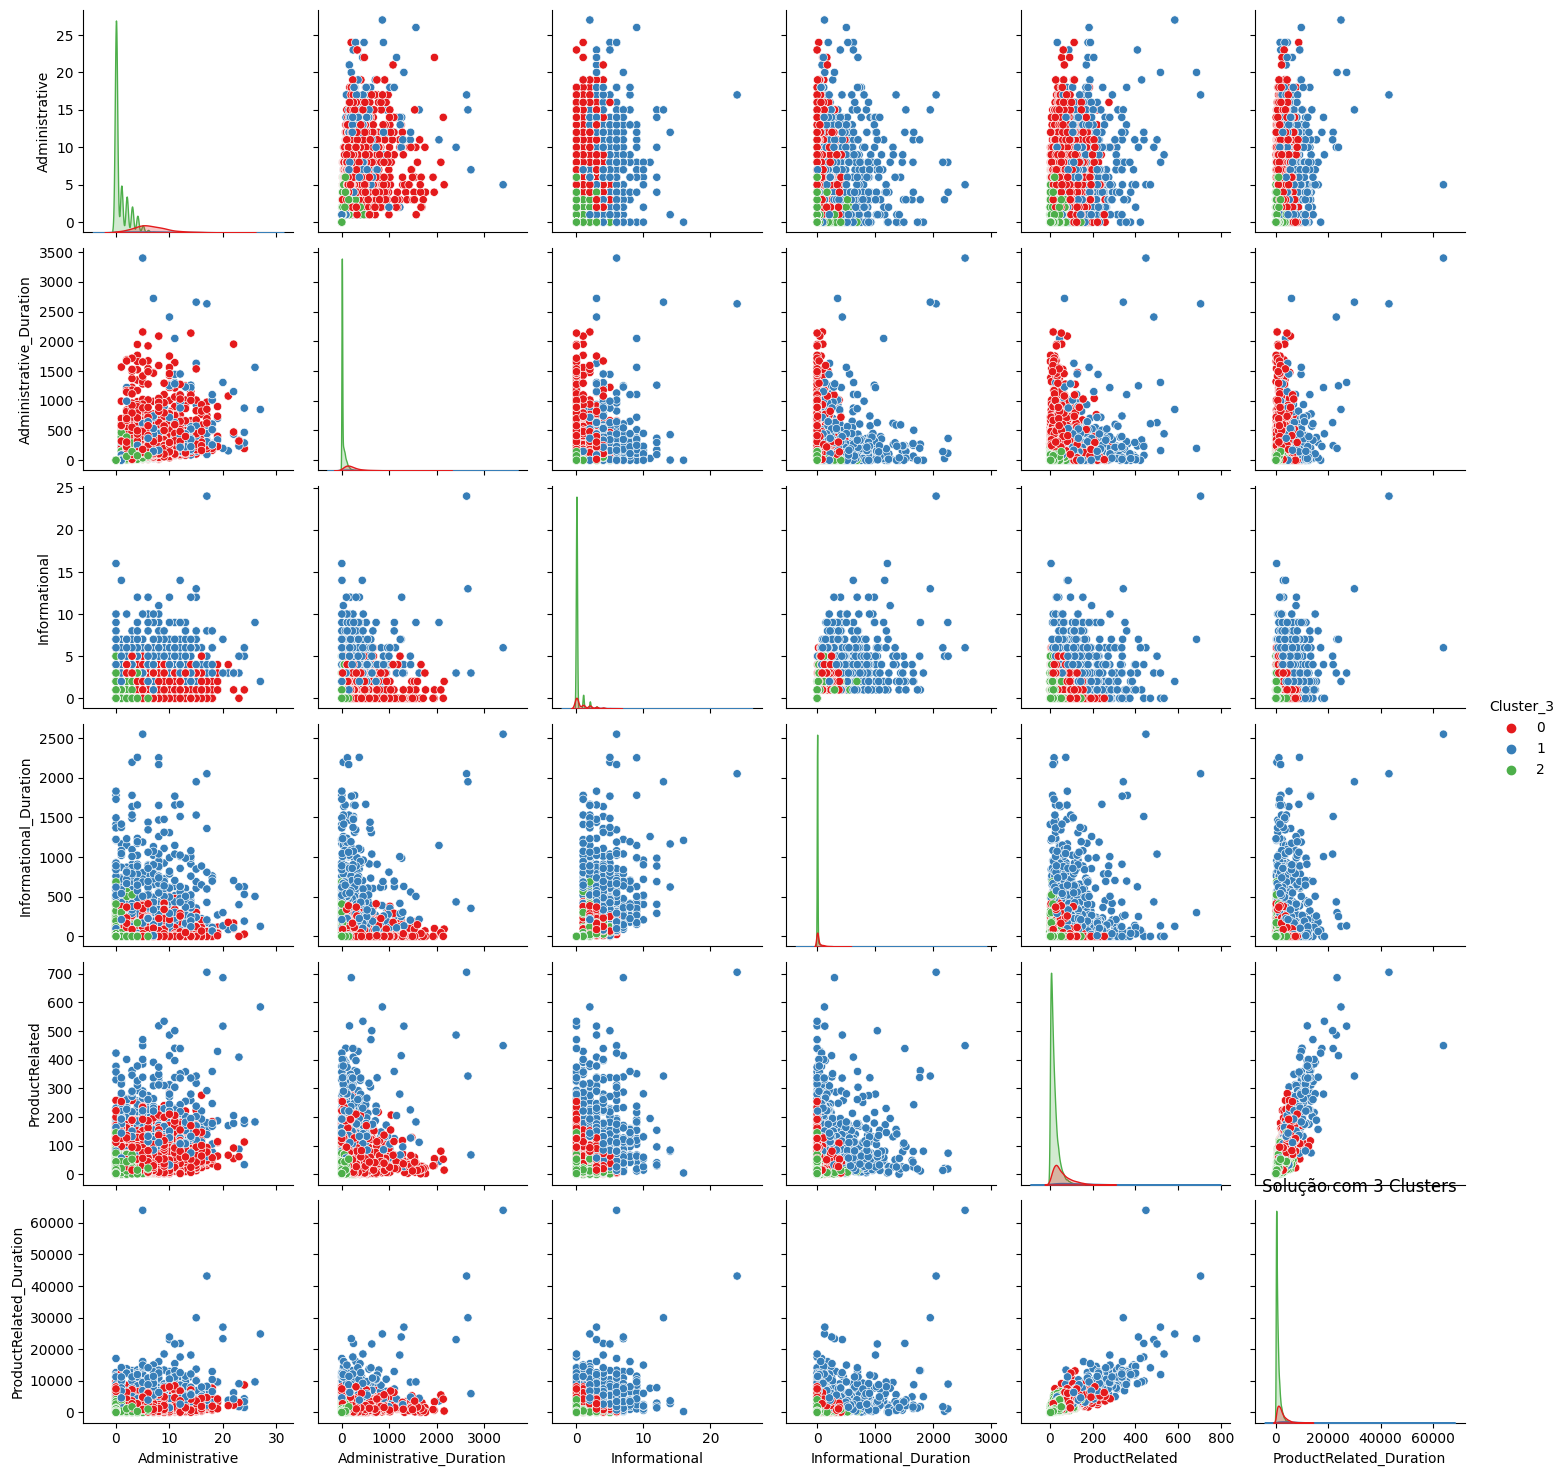

In [24]:
# Visualização dos clusters (3 clusters)
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Cluster_3', vars=cols_of_interest, palette="Set1")
plt.title("Solução com 3 Clusters")
plt.show()

<Figure size 1000x600 with 0 Axes>

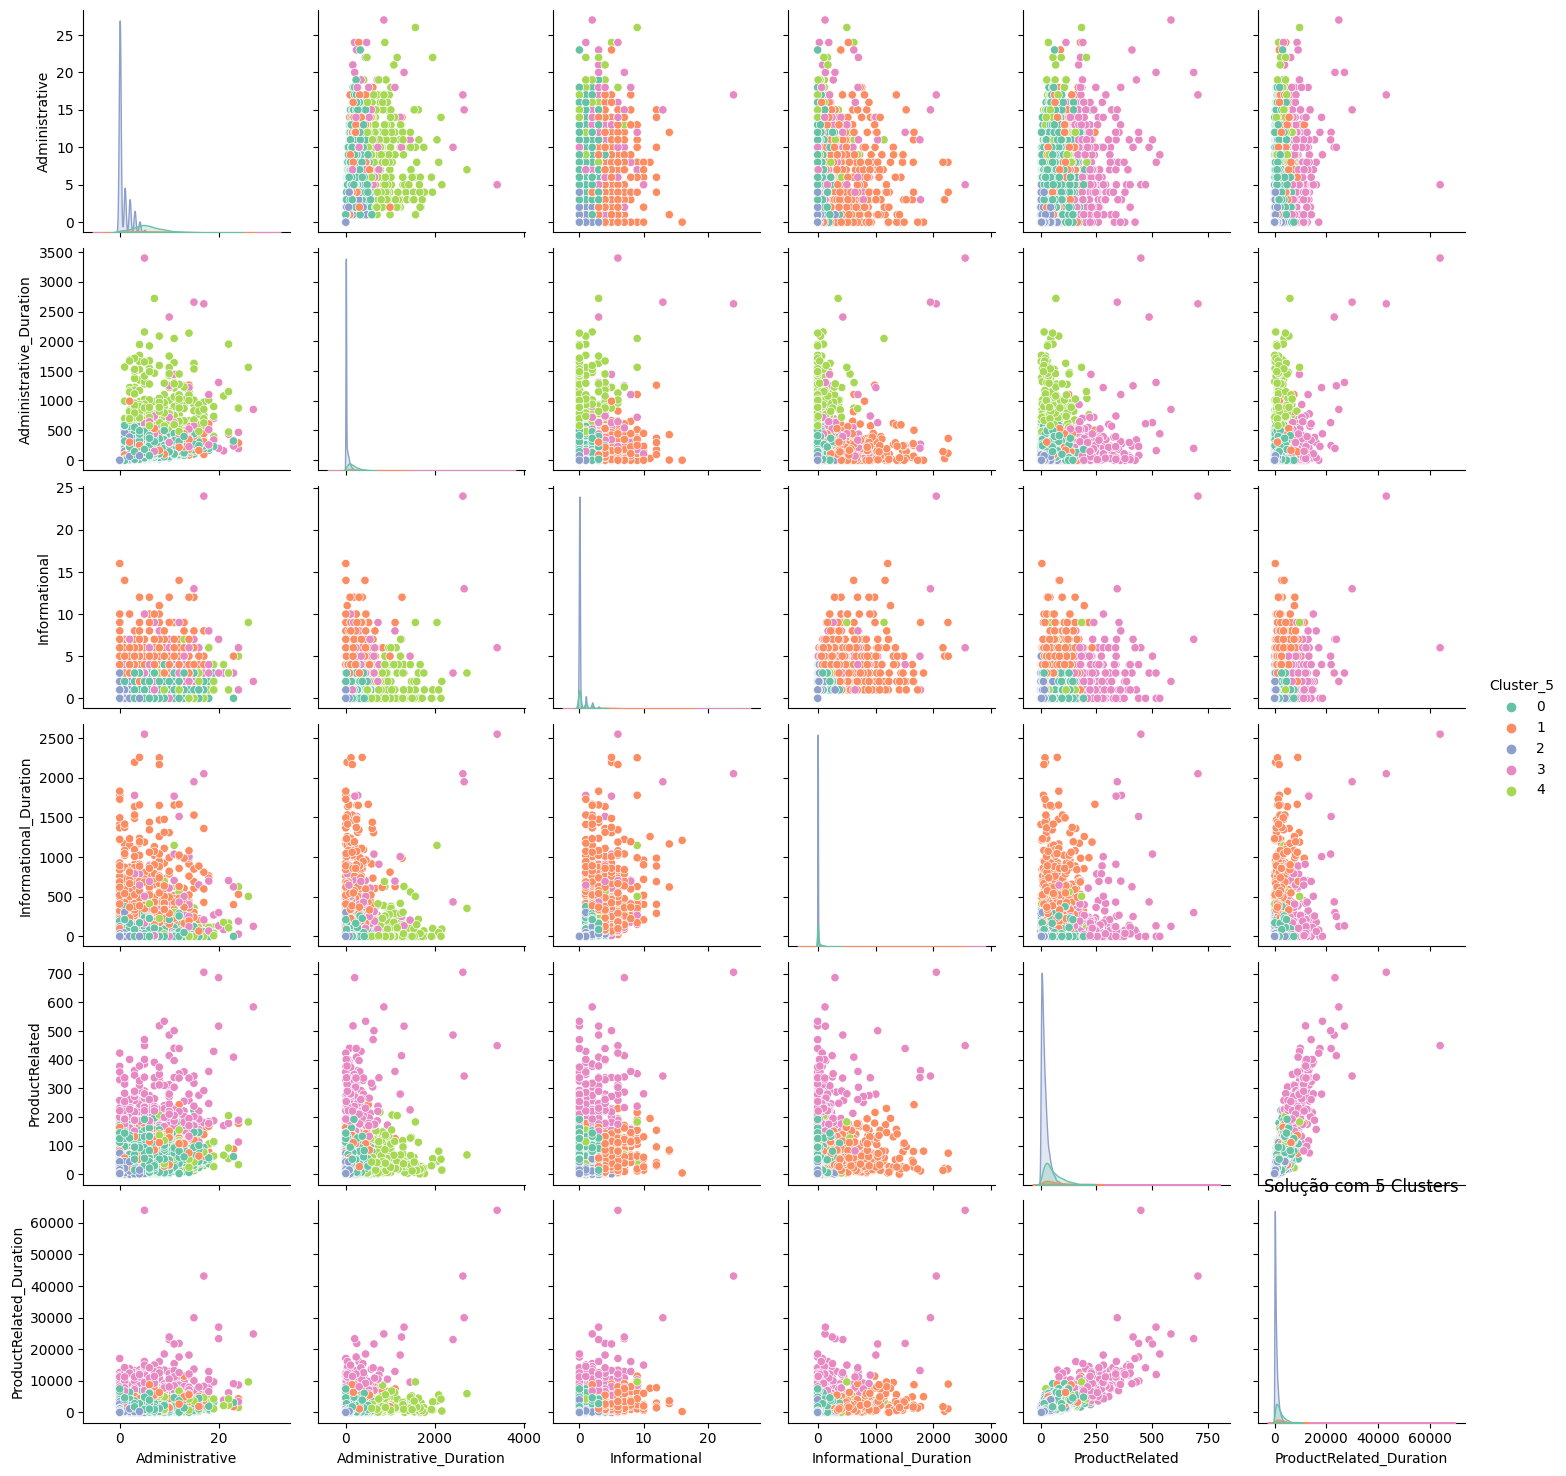

In [25]:
# Visualização dos clusters (5 clusters)
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='Cluster_5', vars=cols_of_interest, palette="Set2")
plt.title("Solução com 5 Clusters")
plt.show()

In [26]:
# 3. Contagem de elementos por cluster para cada solução
print("\nContagem de elementos para cada cluster (3 clusters):")
print(df['Cluster_3'].value_counts())


Contagem de elementos para cada cluster (3 clusters):
Cluster_3
2    9294
0    2469
1     567
Name: count, dtype: int64


In [27]:
print("\nContagem de elementos para cada cluster (5 clusters):")
print(df['Cluster_5'].value_counts())


Contagem de elementos para cada cluster (5 clusters):
Cluster_5
2    8572
0    2690
1     568
4     261
3     239
Name: count, dtype: int64


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

# Avaliação dos Grupos
Com base nos gráficos do Método do Cotovelo e do Coeficiente de Silhueta, bem como nas contagens de clientes em cada cluster, podemos fazer as seguintes análises:

## Método do Cotovelo
No gráfico do método do cotovelo, o "cotovelo" aparece por volta de 3 clusters, o que indica que dividir os dados em 3 grupos poderia ser uma boa escolha. Isso sugere que, após 3 clusters, adicionar mais grupos não traz uma redução significativa na inércia (variação dentro dos clusters).

## Coeficiente de Silhueta
O coeficiente de silhueta foi mais alto para 2 clusters, mas se mantém razoavelmente elevado (em torno de 0,5) para 3 clusters. Isso indica que a separação entre os grupos continua sendo satisfatória com 3 clusters.

## Contagem de Elementos por Cluster:
### 3 Clusters:

Cluster 0: 2469 clientes
Cluster 1: 567 clientes
Cluster 2: 9294 clientes

### 5 Clusters:

Cluster 0: 2690 clientes
Cluster 1: 568 clientes
Cluster 2: 8572 clientes
Cluster 3: 239 clientes
Cluster 4: 261 clientes

Na solução com 3 clusters, temos grupos com tamanhos mais balanceados e interpretáveis. A solução com 5 clusters tem grupos muito pequenos (como os clusters 3 e 4), que podem representar outliers ou comportamentos bem específicos.

## Avaliação com Base em Bounce Rate e Revenue:
- Cluster 1 (em ambas as soluções) contém o menor número de clientes (567 em 3 clusters, 568 em 5 clusters). Caso esse grupo tenha uma alta taxa de rejeição (bounce rate), ele poderia representar clientes com baixa propensão de compra ou menos engajados.
- Cluster 2 é o maior em ambas as soluções, representando a maioria dos clientes. Se a análise de bounce rate e revenue para este grupo mostrar que eles têm uma boa propensão de compra, esse grupo pode representar o público-alvo principal com maior valor.

Na solução com 5 clusters, os clusters 3 e 4 são muito pequenos e podem representar grupos com comportamentos muito diferentes, como clientes VIP (com alta taxa de conversão) ou simplesmente outliers (clientes com comportamento atípico).
Com base no método do cotovelo e no coeficiente de silhueta, a solução com 3 clusters parece mais adequada, equilibrando simplicidade e qualidade de agrupamento.

## Sugestão de Nomes para os Grupos:
- Cluster 0: Visitantes Regulares – Clientes que navegam moderadamente e podem estar interessados em compras futuras.
- Cluster 1: Visitantes Desengajados – Clientes com alta taxa de rejeição, provavelmente com menor interesse em comprar.
- Cluster 2: Visitantes Engajados – Clientes que navegam bastante e têm uma maior propensão a realizar compras.